In [4]:
pip install openpyxl

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import requests

In [13]:
df_laliga_2012y13 = pd.read_csv('espana-master/2010s/2012-13/es.1.csv')
df_laliga_2012y13
new = df_laliga_2012y13['FT'].str.split('-',n=1,expand=True)
df_laliga_2012y13['GolesLocal']=new[0]
df_laliga_2012y13['GolesVisitante']=new[1]
df_laliga_2012y13

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Sat Aug 18 2012,RCD Mallorca,2-1,RCD Espanyol,2,1
1,1,Sat Aug 18 2012,Sevilla FC,2-1,Getafe CF,2,1
2,1,Sat Aug 18 2012,RC Celta Vigo,0-1,Málaga CF,0,1
3,1,Sun Aug 19 2012,Levante UD,1-1,Atlético Madrid,1,1
4,1,Sun Aug 19 2012,Real Madrid,1-1,Valencia CF,1,1
...,...,...,...,...,...,...,...
375,38,Sat Jun 1 2013,RC Celta Vigo,1-0,RCD Espanyol,1,0
376,38,Sat Jun 1 2013,Rayo Vallecano,2-2,Athletic Club Bilbao,2,2
377,38,Sat Jun 1 2013,Sevilla FC,4-3,Valencia CF,4,3
378,38,Sat Jun 1 2013,Real Madrid,4-2,CA Osasuna,4,2


In [14]:
df_laliga_2012y13['GolesLocal']=pd.to_numeric(df_laliga_2012y13['GolesLocal'], downcast="float")
df_laliga_2012y13['GolesVisitante']=pd.to_numeric(df_laliga_2012y13['GolesVisitante'], downcast="float")

df_laliga_2012y13['TotalGolesPartido'] = df_laliga_2012y13['GolesLocal']+df_laliga_2012y13['GolesVisitante']
df_laliga_2012y13


,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Sat Aug 18 2012,RCD Mallorca,2-1,RCD Espanyol,2.0,1.0,3.0
1,1,Sat Aug 18 2012,Sevilla FC,2-1,Getafe CF,2.0,1.0,3.0
2,1,Sat Aug 18 2012,RC Celta Vigo,0-1,Málaga CF,0.0,1.0,1.0
3,1,Sun Aug 19 2012,Levante UD,1-1,Atlético Madrid,1.0,1.0,2.0
4,1,Sun Aug 19 2012,Real Madrid,1-1,Valencia CF,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
375,38,Sat Jun 1 2013,RC Celta Vigo,1-0,RCD Espanyol,1.0,0.0,1.0
376,38,Sat Jun 1 2013,Rayo Vallecano,2-2,Athletic Club Bilbao,2.0,2.0,4.0
377,38,Sat Jun 1 2013,Sevilla FC,4-3,Valencia CF,4.0,3.0,7.0
378,38,Sat Jun 1 2013,Real Madrid,4-2,CA Osasuna,4.0,2.0,6.0


In [15]:
df_laliga_2012y13['GolesLocal'].sum()

641.0

In [16]:
df_laliga_2012y13['GolesVisitante'].sum()

450.0

In [55]:

df_laliga_2012y13.describe()


,Round,GolesLocal,GolesVisitante,TotalGolesPartido
count,380.000000,380.000000,380.000000,380.000000
mean,19.500000,1.686842,1.184211,2.871053
std,10.980313,1.393288,1.145261,1.782857
min,1.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,2.000000
50%,19.500000,1.000000,1.000000,3.000000
75%,29.000000,2.000000,2.000000,4.000000
max,38.000000,6.000000,5.000000,9.000000


In [57]:
#Aquí con esto tendríamos a nivel de goles el total de esta temporada. 
df_laliga_2012y13['TotalGolesPartido'].sum()

1091.0

In [89]:
BarsaL_1 = df_laliga_2012y13.loc[df_laliga_2012y13['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_1.reset_index(inplace=True)
BarsaL_1

,index,GolesLocal
0,5,5.0
1,27,1.0
2,42,2.0
3,68,2.0
4,92,3.0
5,110,3.0
6,134,5.0
7,154,4.0
8,176,4.0
9,206,5.0


In [87]:
BarsaV_1 = df_laliga_2012y13.loc[df_laliga_2012y13['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_1.reset_index(inplace=True)


In [91]:
BarsaTot_1=pd.merge(BarsaL_1, BarsaV_1, left_index=True, right_index=True)
BarsaTot_1

,index_x,GolesLocal,index_y,GolesVisitante
0,5,5.0,17,2.0
1,27,1.0,30,4.0
2,42,2.0,50,3.0
3,68,2.0,71,5.0
4,92,3.0,83,5.0
5,110,3.0,108,4.0
6,134,5.0,125,4.0
7,154,4.0,145,2.0
8,176,4.0,166,3.0
9,206,5.0,188,3.0


In [93]:
BarsaTot_1['GolesTotales']=BarsaTot_1['GolesLocal']+BarsaTot_1['GolesVisitante']

BarsaTot_1['GolesTotales'].sum()

115.0

In [153]:
RealMadridL_1 = df_laliga_2012y13.loc[df_laliga_2012y13['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_1.reset_index(inplace=True)
#RealMadridL_1['Equipo']='Real Madrid'
RealMadridL_1

,index,GolesLocal
0,4,1.0
1,28,3.0
2,55,5.0
3,70,2.0
4,91,4.0
5,113,5.0
6,131,2.0
7,156,2.0
8,177,4.0
9,208,4.0


In [53]:
RealMadridL_1['GolesLocal'].sum()

67.0

In [64]:
RealMadridL_1['GolesLocal'].max()

6.0

In [152]:
RealMadridV_1 = df_laliga_2012y13.loc[df_laliga_2012y13['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_1.reset_index(inplace=True)

#RealMadridV_1['Equipo']='Real Madrid'
RealMadridV_1


,index,GolesVisitante
0,14,1.0
1,31,0.0
2,47,2.0
3,68,2.0
4,84,5.0
5,105,2.0
6,121,0.0
7,142,3.0
8,168,2.0
9,184,0.0


In [54]:
RealMadridV_1['GolesVisitante'].sum()

36.0

In [63]:
RealMadridV_1['GolesVisitante'].max()

5.0

In [154]:
Madrid_Tot_1=pd.merge(RealMadridL_1, RealMadridV_1, left_index=True, right_index=True)
Madrid_Tot_1

,index_x,GolesLocal,index_y,GolesVisitante
0,4,1.0,14,1.0
1,28,3.0,31,0.0
2,55,5.0,47,2.0
3,70,2.0,68,2.0
4,91,4.0,84,5.0
5,113,5.0,105,2.0
6,131,2.0,121,0.0
7,156,2.0,142,3.0
8,177,4.0,168,2.0
9,208,4.0,184,0.0


In [155]:
Madrid_Tot_1['GolesTotales']=Madrid_Tot_1['GolesLocal']+Madrid_Tot_1['GolesVisitante']
Madrid_Tot_1

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,4,1.0,14,1.0,2.0
1,28,3.0,31,0.0,3.0
2,55,5.0,47,2.0,7.0
3,70,2.0,68,2.0,4.0
4,91,4.0,84,5.0,9.0
5,113,5.0,105,2.0,7.0
6,131,2.0,121,0.0,2.0
7,156,2.0,142,3.0,5.0
8,177,4.0,168,2.0,6.0
9,208,4.0,184,0.0,4.0


In [159]:
Madrid_Tot_1['GolesLocal'].sum()

67.0

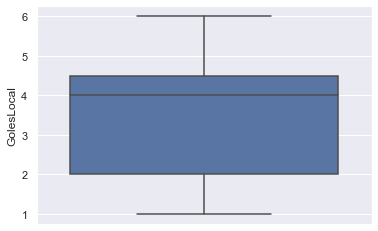

In [196]:
sns.boxplot(y=Madrid_Tot_1['GolesLocal'])
plt.show()

In [160]:
Madrid_Tot_1['GolesVisitante'].sum()

36.0

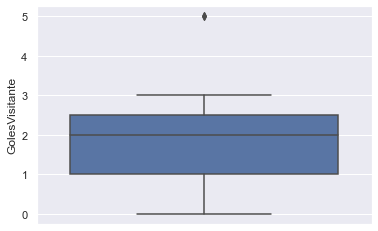

In [195]:
sns.boxplot(y=Madrid_Tot_1['GolesVisitante'])
plt.show()

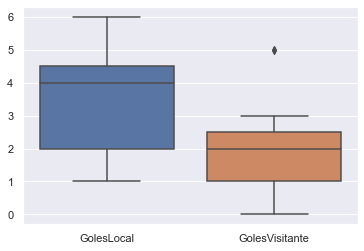

In [197]:
sns.boxplot(data=Madrid_Tot_1.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


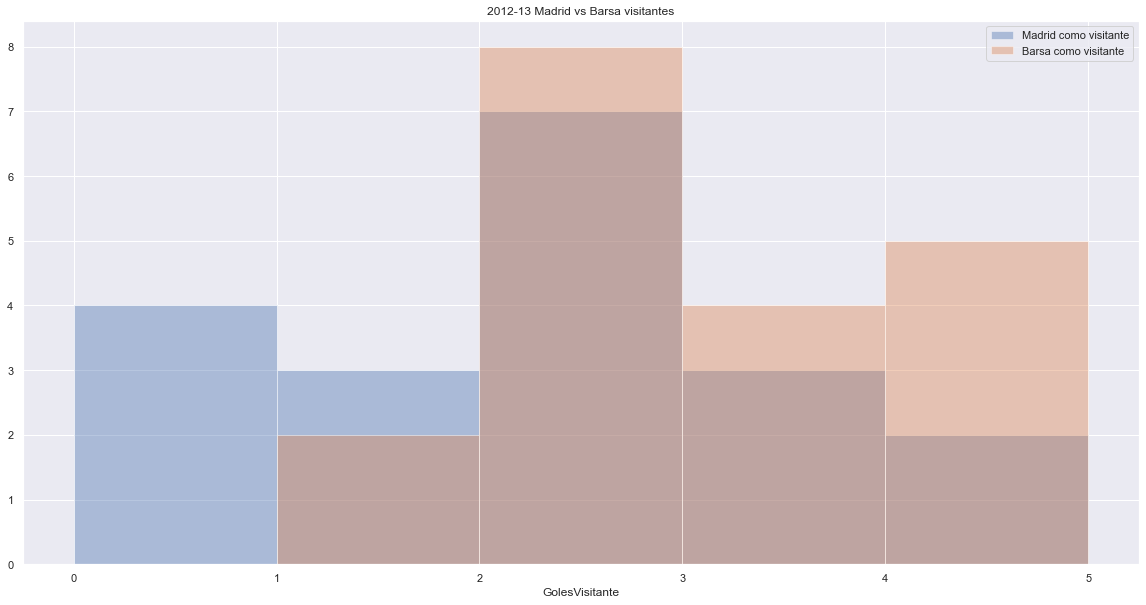

In [198]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_1['GolesVisitante'],kde=False, label='Madrid como visitante')
sns.distplot(BarsaTot_1['GolesVisitante'],kde=False, label='Barsa como visitante')
plt.title("2012-13 Madrid vs Barsa visitantes")
plt.legend()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


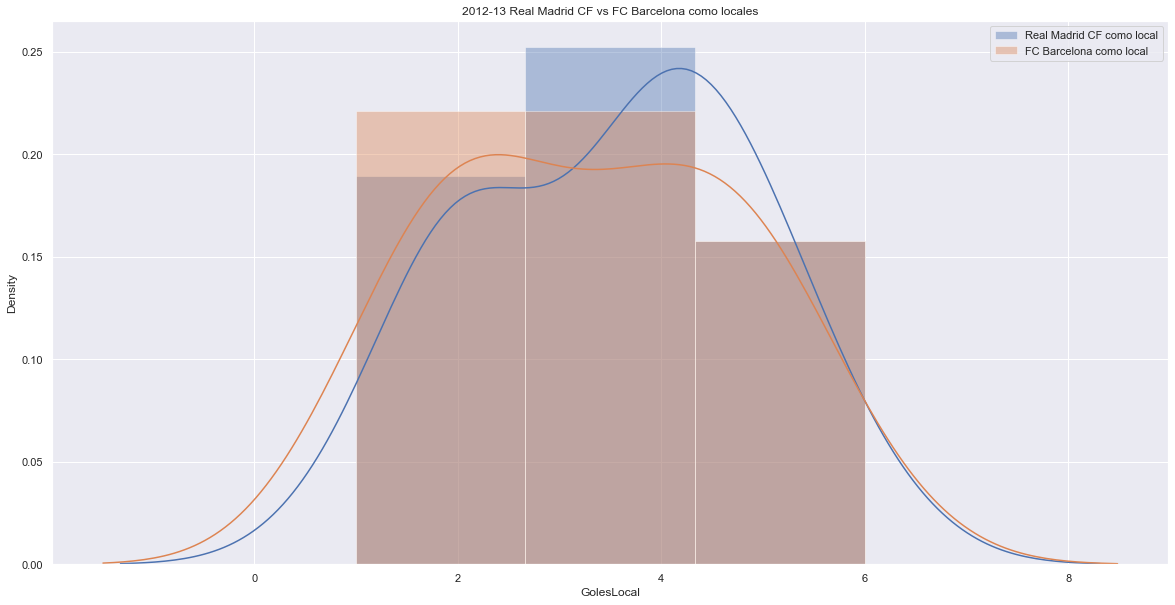

In [163]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_1['GolesLocal'], label='Real Madrid CF como local')
sns.distplot(BarsaTot_1['GolesLocal'], label='FC Barcelona como local')
plt.title("2012-13 Real Madrid CF vs FC Barcelona como locales")
plt.legend()


In [107]:
BarsaTot_1

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,5,5.0,17,2.0,7.0
1,27,1.0,30,4.0,5.0
2,42,2.0,50,3.0,5.0
3,68,2.0,71,5.0,7.0
4,92,3.0,83,5.0,8.0
5,110,3.0,108,4.0,7.0
6,134,5.0,125,4.0,9.0
7,154,4.0,145,2.0,6.0
8,176,4.0,166,3.0,7.0
9,206,5.0,188,3.0,8.0


In [97]:
BarsaTot_1['GolesTotales'].sum()

115.0

In [117]:
BarsaTot_1['GolesLocal'].sum()

63.0

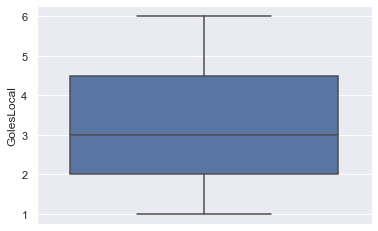

In [199]:
sns.boxplot(y=BarsaTot_1['GolesLocal'])
plt.show()

In [121]:
BarsaTot_1['GolesLocal'].describe()

count    19.000000
mean      3.315789
std       1.492672
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       6.000000
Name: GolesLocal, dtype: float64

En 19 partidos como local: Media de 3,3 goles por partido. Mínima anotación 1 gol. Máxima anotación 6 goles.

In [200]:
BarsaTot_1['GolesVisitante'].sum()

52.0

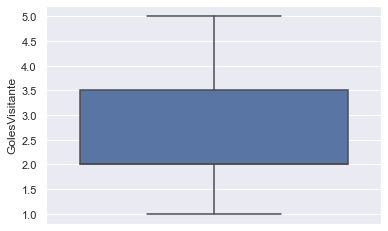

In [201]:
sns.boxplot(y=BarsaTot_1['GolesVisitante'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


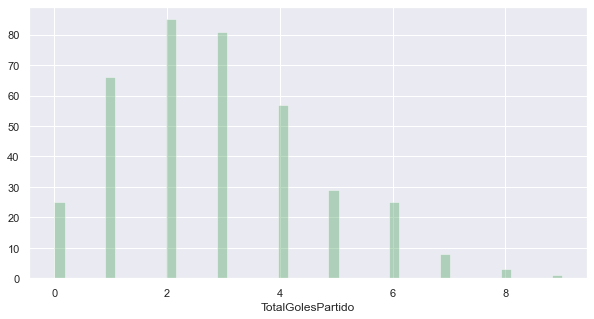

In [165]:
#Este gráfico nos muestra goles por partido y total de partidos con esa cantidad de goles
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2012y13['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


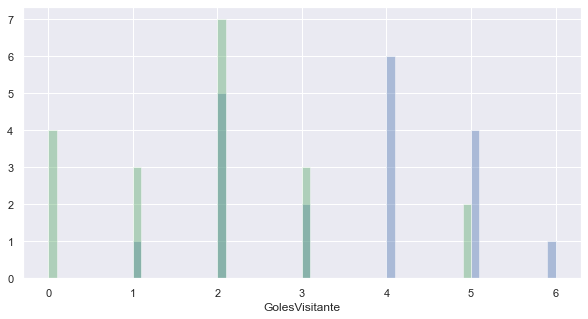

In [186]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_1['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_1['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


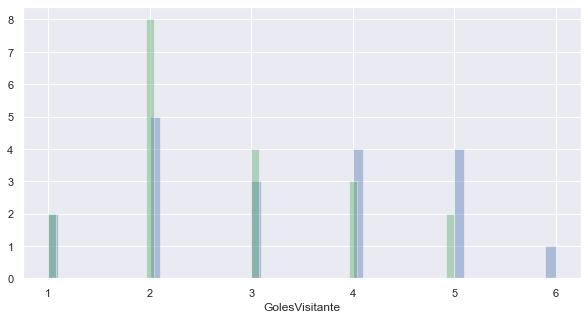

In [187]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_1['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_1['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

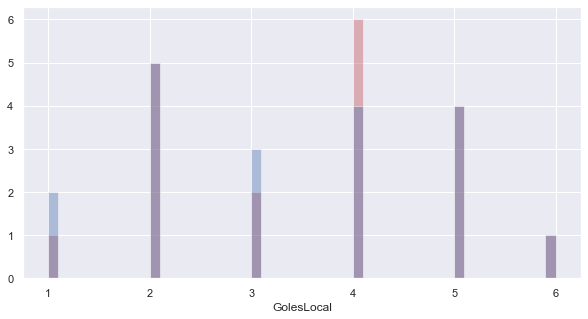

In [204]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_1['GolesLocal'],
             kde=False,
             color='r',
             bins=50);
sns.distplot(BarsaTot_1['GolesLocal'],
             kde=False,
             color='b',
             bins=50);

Barsa vs Madrid 2012-13 como locales

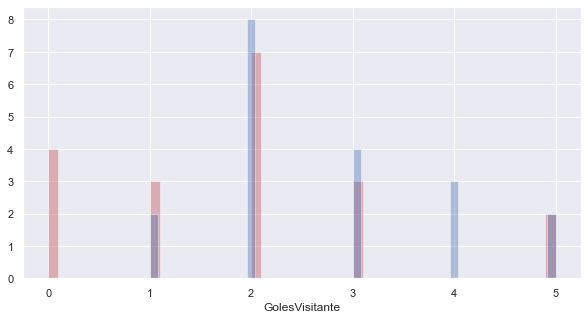

In [205]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_1['GolesVisitante'],
             kde=False,
             color='r',
             bins=50);
sns.distplot(BarsaTot_1['GolesVisitante'],
             kde=False,
             color='b',
             bins=50);

Madrid vs Barsa 2012-13 como Visitantes

In [150]:
df_laliga_2012y13['TotalGolesPartido'].describe()

count    380.000000
mean       2.871053
std        1.782857
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: TotalGolesPartido, dtype: float64

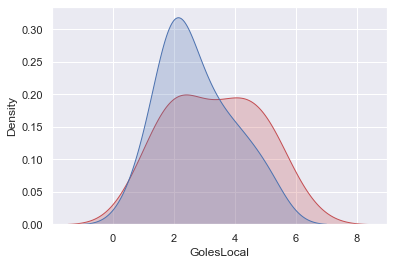

In [149]:
sns.set(style="darkgrid")
fig = sns.kdeplot(BarsaTot_1['GolesLocal'], shade=True, color="r",label='Goles como local FC Barcelona 2012-13')
fig = sns.kdeplot(BarsaTot_1['GolesVisitante'], shade=True, color="b",label='Goles como visitante FC Barcelona 2012-13')
plt.show()

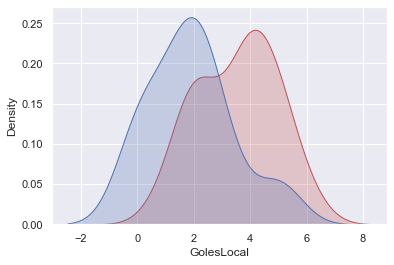

In [164]:
fig = sns.kdeplot(Madrid_Tot_1['GolesLocal'], shade=True, color="r",label='Goles como local Real Madrid CF 2012-13')
fig = sns.kdeplot(Madrid_Tot_1['GolesVisitante'], shade=True, color="b",label='Goles como visitante Real Madrid CF 2012-13')
plt.show()

<AxesSubplot:xlabel='Team 1', ylabel='GolesLocal'>

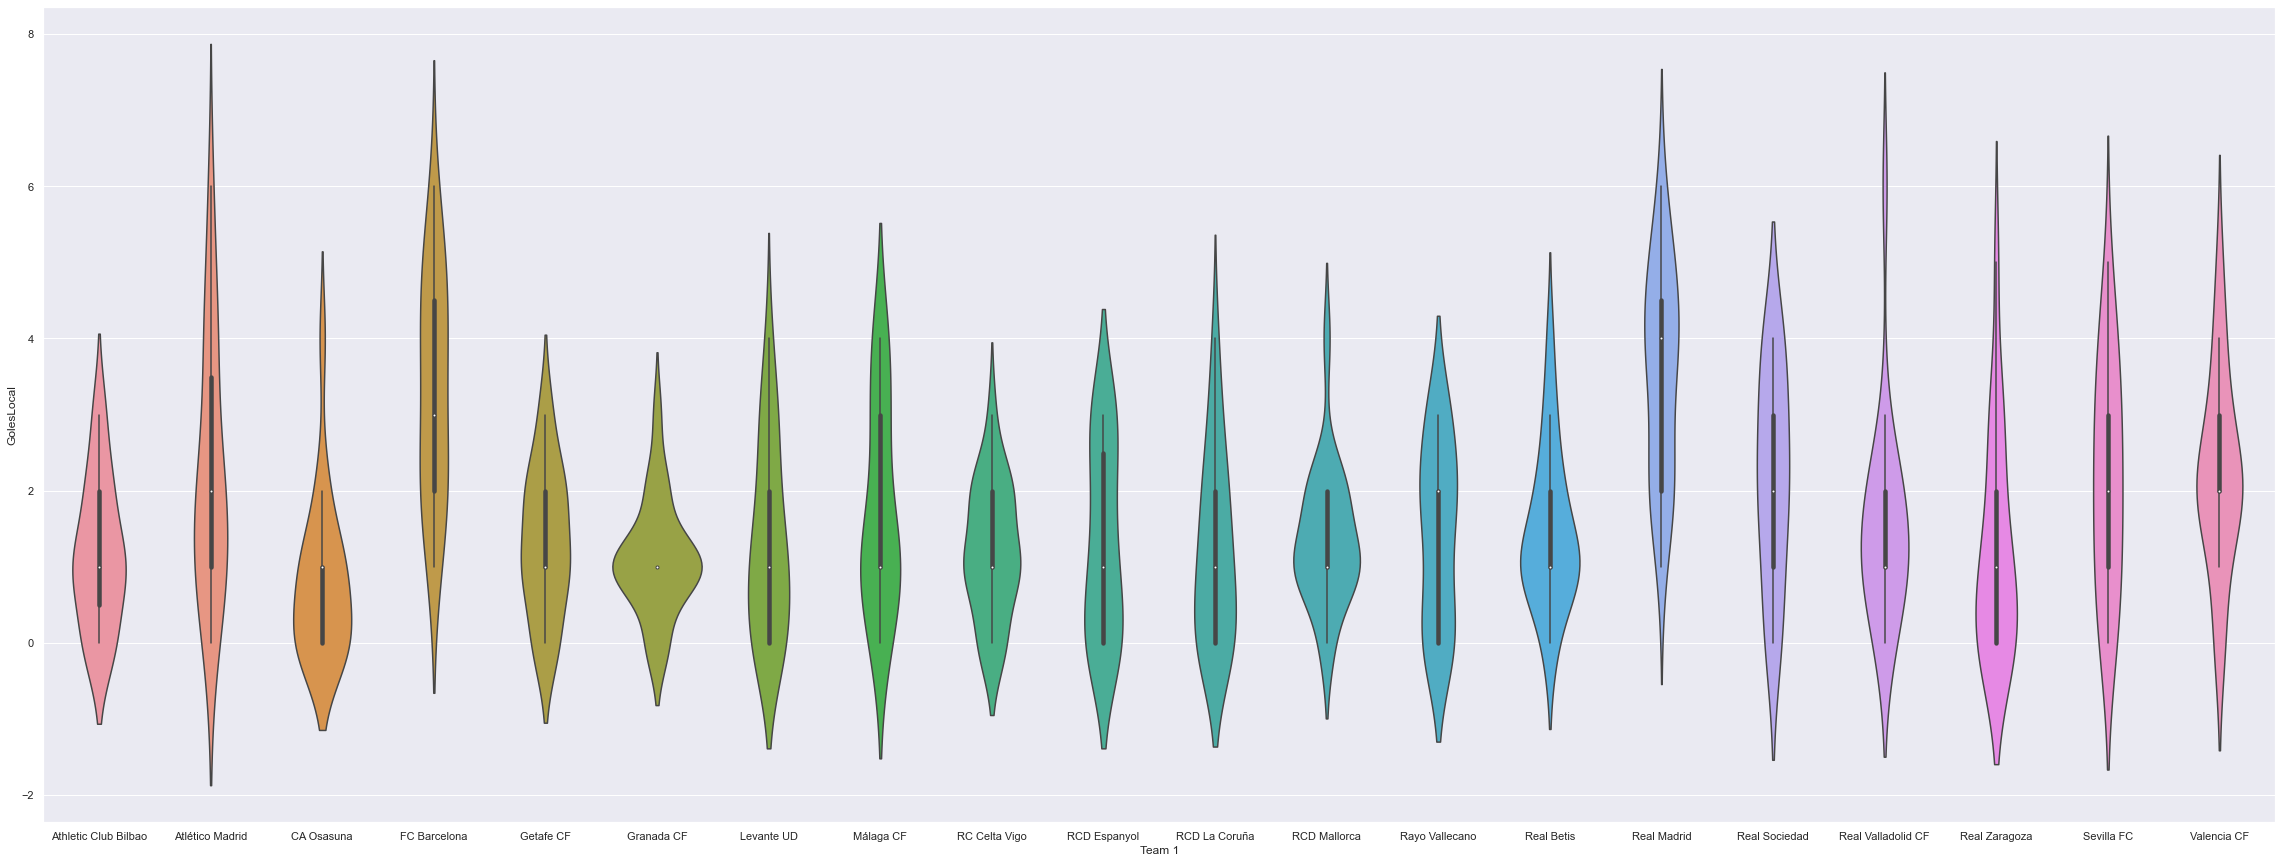

In [209]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2012y13['Team 1'].sort_values(), y=df_laliga_2012y13['GolesLocal'])

LaLiga 2012-13 Goles por equipo como Locales

<AxesSubplot:xlabel='Team 2', ylabel='GolesVisitante'>

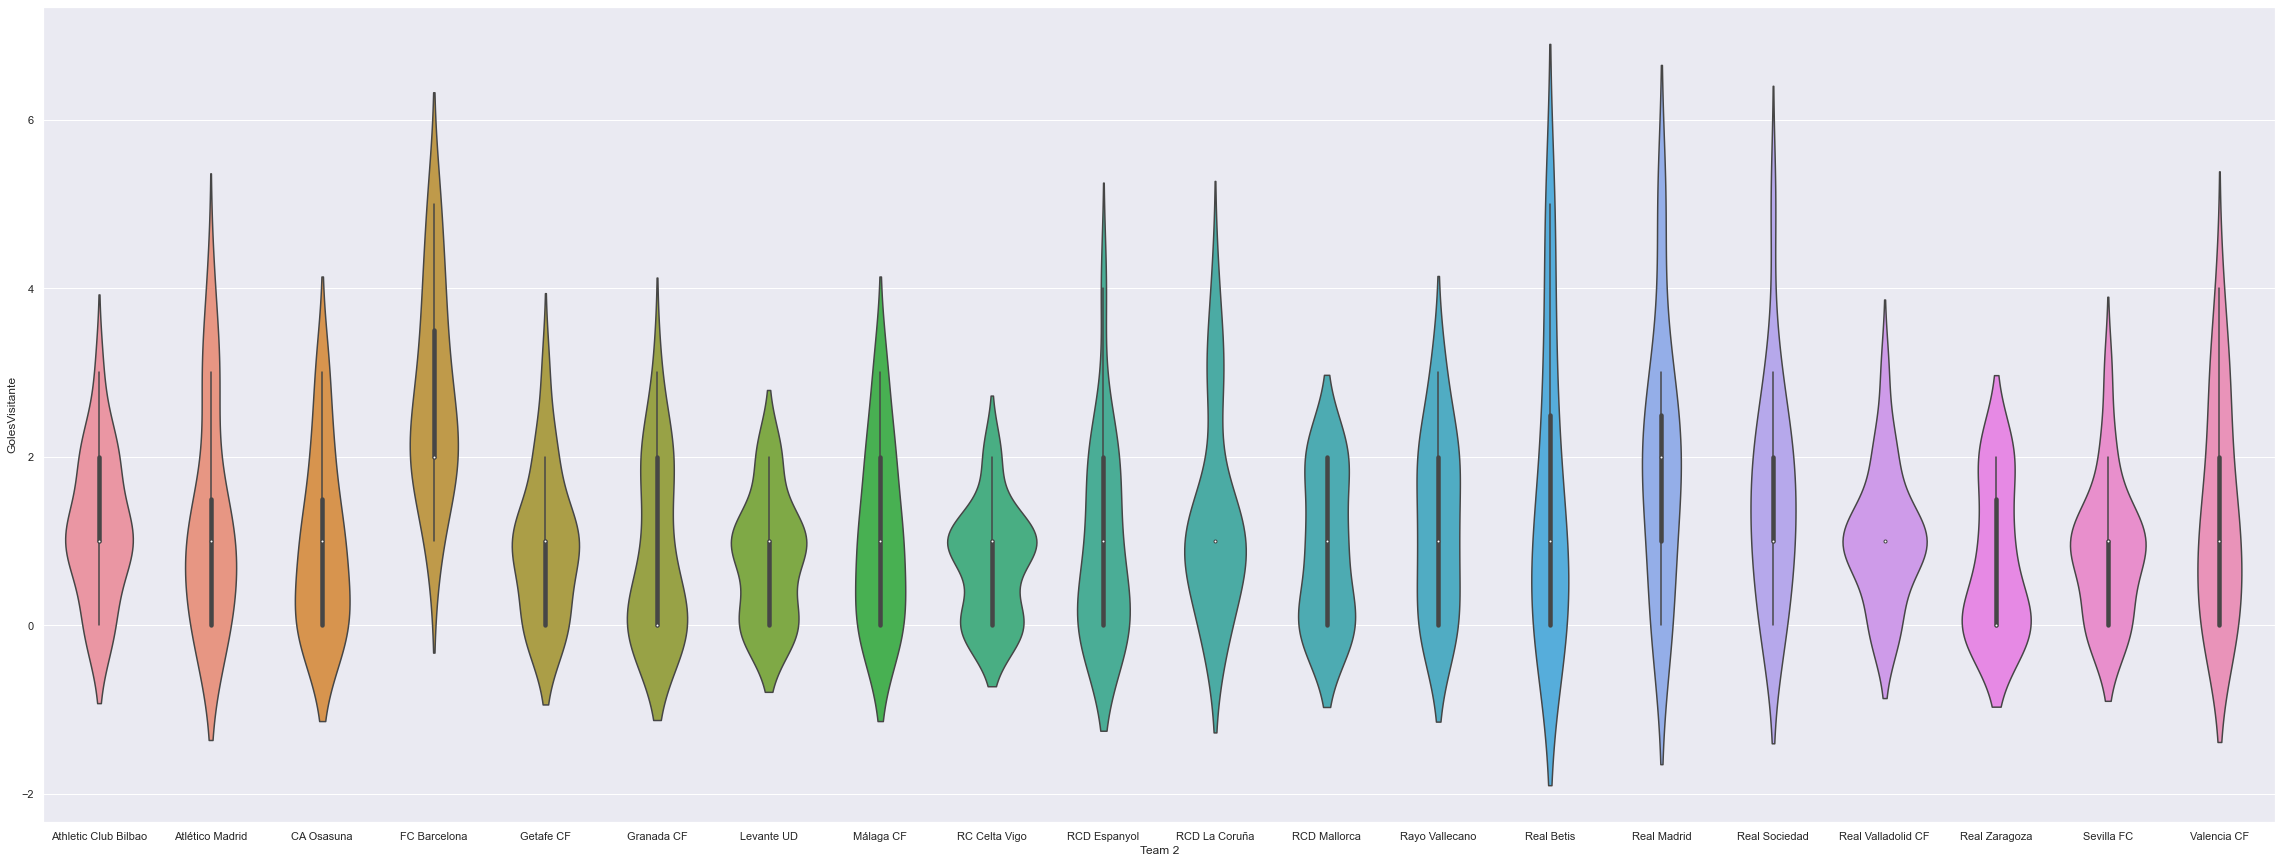

In [208]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2012y13['Team 2'].sort_values(), y=df_laliga_2012y13['GolesVisitante'])

LaLiga 2012-13 Goles por equipo como visitantes

Ganador del campeonato FC Barcelona

In [210]:
Madrid_Tot_1['GolesTotales'].sum()

103.0

In [211]:
BarsaTot_1['GolesTotales'].sum()

115.0